# Core - Hypothesis Testing w/ Insurance Data

In [42]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# importing csv & creating df
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# checking missing values
df.isna().sum().sum()

0

In [5]:
# checking duplicate values
df.duplicated().sum()

1

In [7]:
# dropping duplicate value
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# **Q1. Do smokers have higher insurance charges than non-smokers?**

**Null Hypothesis**: Smokers insurance charge is not higher in comparison to non-smokers

**Alternative Hypothesis**: Smokers have a higher insurance charge in comparison to non-smokers

**Alpha**: 0.05

**Test**: We are comparing smokers to non-smokers, we will test for normality, variance using a T-Test

In [8]:
# locate charges for smokers & non-smokers
smoker = df.loc[df['smoker']=='yes','charges']
non_smoker = df.loc[df['smoker']=='no','charges']

# grabbing mean for smoker & non-smokers
print(f'Smoker (n=l{len(smoker)}):Mean={np.mean(smoker):.2f}')
print(f'Non-Smoker (n=l{len(smoker)}):Mean={np.mean(non_smoker):.2f}')

Smoker (n=l274):Mean=32050.23
Non-Smoker (n=l274):Mean=8440.66


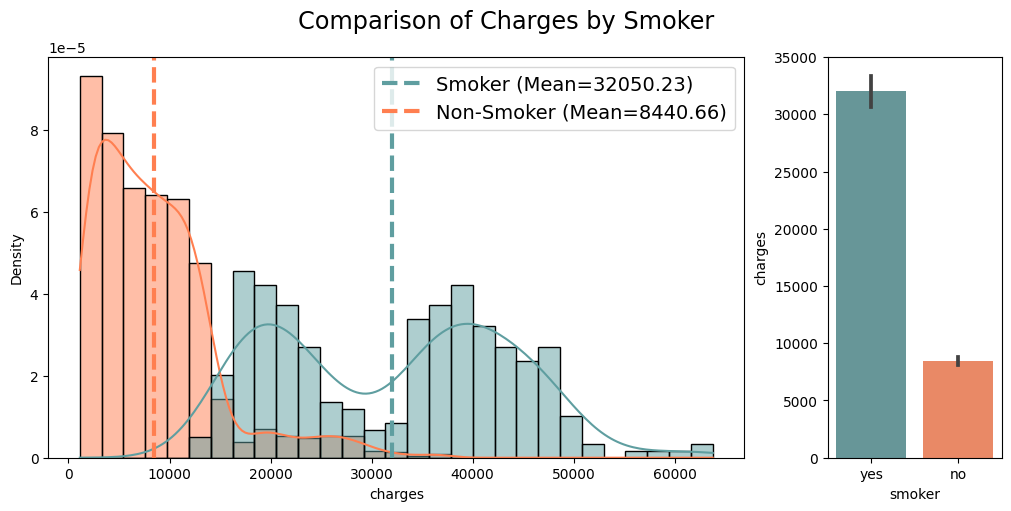

In [11]:
# setting palette
smoker_palette={'yes':'cadetblue', 'no':'coral'}

# visualize sample means
fig, (ax,ax_bar) = plt.subplots(figsize=(10,5), ncols=2,
                               constrained_layout=True,
                               gridspec_kw={'width_ratios':[0.8,0.2]})

# creating histogram
ax = sns.histplot(data=df, x='charges', fill=True, hue='smoker', kde=True,
                  stat='density', common_norm=False, ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker), ls='--', lw=3,
           label=f'Smoker (Mean={np.mean(smoker):.2f})', color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker), ls='--', lw=3,
           label=f'Non-Smoker (Mean={np.mean(non_smoker):.2f})', color=smoker_palette['no'])

ax.legend(prop={'size':14}, loc='upper right')

# creating barplot
sns.barplot(data=df, x='smoker', y='charges', ax=ax_bar, palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoker', fontsize='xx-large');

**Outlier Check**

In [12]:
# locating smoker outliers
smoker_zscores = stats.zscore(smoker)
smoker_outliers = abs(smoker_zscores) > 3
np.sum(smoker_outliers)

0

In [13]:
# locating non-smoker outliers
non_smoker_zscores = stats.zscore(non_smoker)
non_smoker_outliers = abs(non_smoker_zscores) > 3
np.sum(non_smoker_outliers)

24

**Normality Check**

In [16]:
# checking smoker normality
smoker_res = stats.normaltest(smoker)
print(f'Smoker Results: {smoker_res}')

Smoker Results: NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


In [18]:
# checking non-smoker normality
non_smoker_res = stats.normaltest(non_smoker)
print(f'Non-Smoker Results: {non_smoker_res}')

Non-Smoker Results: NormaltestResult(statistic=316.23579659917766, pvalue=2.1392881146814186e-69)


P-Value for both smokers & non-smokers are above our Alpha of 0.05. We can move forward and assume this is a normal distribution.

**Levene Test - For Equal Variance**

In [20]:
res = stats.levene(smoker, non_smoker)
res

LeveneResult(statistic=332.47137394800666, pvalue=1.670117565125241e-66)

We reject our null hypothesis since our P-Value is less than 0.05 and there is no sign of equal variance.

**Independent T--Test**

In [23]:
results = stats.ttest_ind(smoker, non_smoker, equal_var=False)
print(results)
print(f'Significant: {results.pvalue < 0.05}')

Ttest_indResult(statistic=32.7423097372529, pvalue=6.261720774727631e-103)
Significant: True


**Final Conclusion**

We reject our null hypothesis & accept our alternative hypothesis because our P-Value is less than 0.05. 

# **Q2. Are men more likely to smoke than women?**

**Null Hypothesis**: Men are just likely to be smokers in comparison to women

**Alternative Hypothesis**: Men are more likely to smoke in comparison to women.

**Alpha**: 0.05

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [28]:
# creating new df for smokers
# replacing yes/no to 0/1
# citing: https://stackoverflow.com/questions/50286017/converting-yes-to-1-and-no-to-0-in-python
df1 = df
df1['smoker'] = df1['smoker'].apply(lambda x:0 if x=='no' else 1)
df1['smoker'].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

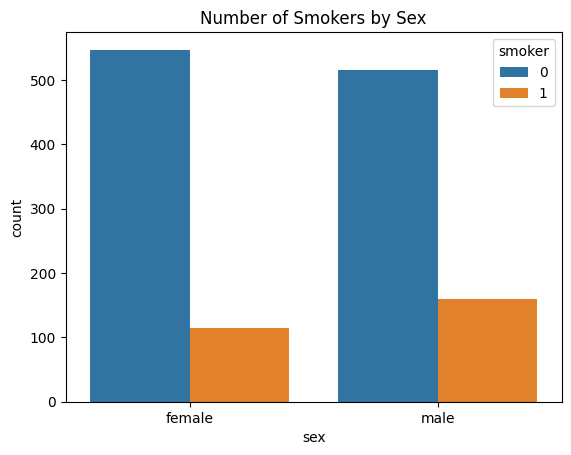

In [29]:
ax = sns.countplot(data=df1, x='sex', hue='smoker')
ax.set_title('Number of Smokers by Sex');

**Categorical Hypothesis Test - Chi-Squared Test**

In [30]:
# calculating contingency table
table = pd.crosstab(df1['sex'],df1['smoker'])
table

smoker,0,1
sex,,
female,547,115
male,516,159


In [31]:
# run test & save output
result = stats.chi2_contingency(table)
chie2, p, deg_free, expected_vals = result

In [33]:
print(p)
print(f'Significant: {p < 0.05}')

0.0062765550120107375
Significant: True


**Final Conclusion**

We reject our null hypothesis and accept our alternative hypothesis since our P-Value is less than 0.05

# **Q3. Do different regions have different charges, on average?**

**Null Hypothesis**: No difference in average charges based on region.

**Alternative Hypothesis**: There is a an average charge difference based on region. 

**Alpha**: 0.05

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [35]:
# checking region value counts
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

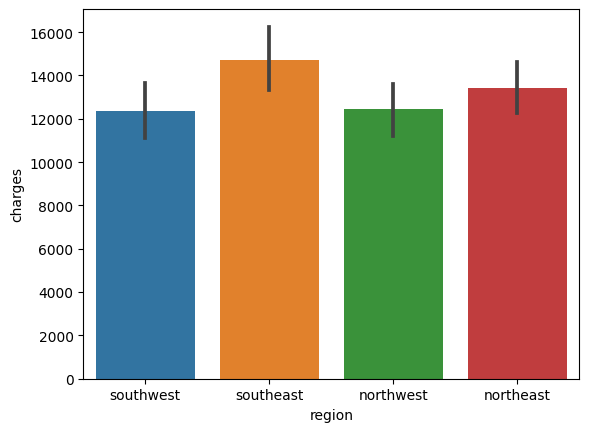

In [36]:
# create barplot to display regions based on charges
sns.barplot(data=df, x='region', y='charges');

**Separating Groups**

In [37]:
# create dictionary for groups. $ groups, more groups = better
groups = {}

# loop through unique cats
for i in df['region'].unique():
    data = df.loc[df['region']==i, 'charges'].copy()
    
    # save into dictionary
    groups[i] = data
    
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

**Testing Assumptions**

In [38]:
# running normal test on each groups & confirming there are > 20 in each group
norm_results = {}

for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
    
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,324.0,6.502634e-24,106.779670
northeast,324.0,1.455431e-19,86.747629


In [39]:
# checking sig with pandas
norm_results_df['sig'] = norm_results_df['p'] < .05
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,324.0,6.502634e-24,106.779670,True
northeast,324.0,1.455431e-19,86.747629,True


**Testing Assumption of Equal Variance**

In [40]:
# running levene test using * operator
stats.levene(*groups.values())

LeveneResult(statistic=5.553479860699911, pvalue=0.0008689544824002284)

**One-Way ANOVA Test**

In [41]:
# performing correct hypothesis test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.926139903662776, pvalue=0.03276288025444947)

**Tukey's Pairwise Multiple Comparisons Test**

In [43]:
# save values as charges and labels as region
values = df['charges']
labels = df['region']

In [44]:
# perform tukey's multiple comparison test and display summary
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-955.5437,0.7457,-3397.7353,1486.648,False
northeast,southeast,1329.0269,0.4746,-1045.1237,3703.1776,False
northeast,southwest,-1059.4471,0.6793,-3499.7595,1380.8652,False
northwest,southeast,2284.5706,0.0643,-89.58,4658.7212,False
northwest,southwest,-103.9035,0.9995,-2544.2158,2336.4088,False
southeast,southwest,-2388.4741,0.0477,-4760.6915,-16.2567,True


**Final Conclusion**

We accept our null hypothesis which was there is no difference in average charges based on region. Only significant difference that is shown is between our southeast region to southwest region. 